<a href="https://colab.research.google.com/github/namantam1/ml-ai-dnn/blob/main/Deep_learning_LSTM_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
if "AAPL.csv" not in os.listdir("."):
  !wget https://github.com/krishnaik06/Stock-MArket-Forecasting/raw/master/AAPL.csv

--2022-12-25 21:05:02--  https://github.com/krishnaik06/Stock-MArket-Forecasting/raw/master/AAPL.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv [following]
--2022-12-25 21:05:02--  https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192243 (188K) [text/plain]
Saving to: ‘AAPL.csv’

AAPL.csv            100%[===================>] 187.74K  --.-KB/s    in 0.02s   

2022-12-25 21:05:03 (11.2 MB/s) - ‘AAPL.csv’ saved [192243/192243]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("AAPL.csv")

df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df_close = df[["close"]]
df_close.shape

(1258, 1)

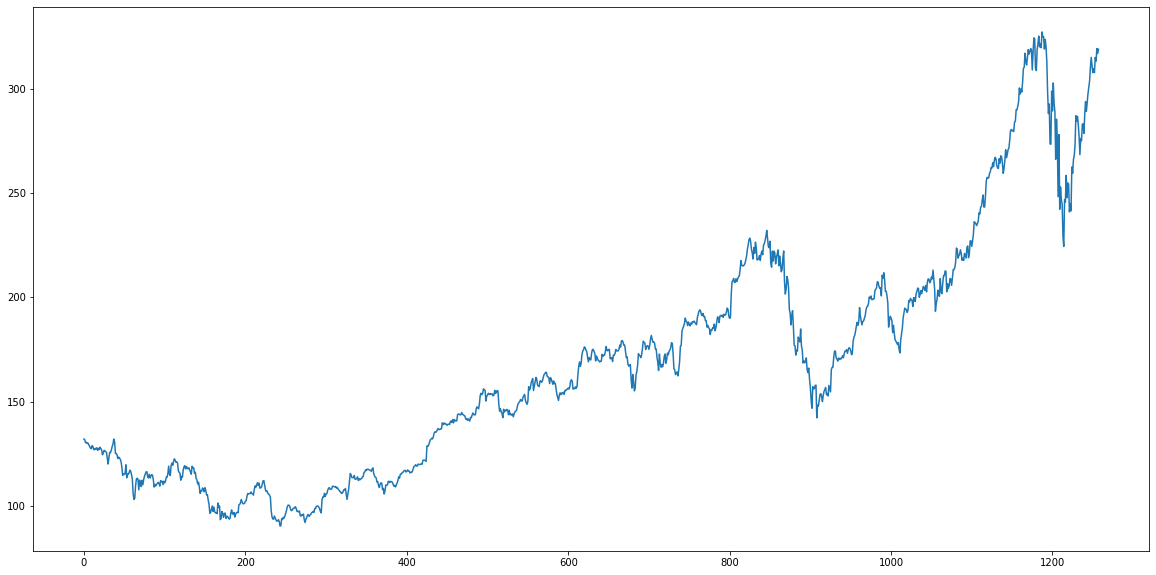

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(df_close)

In [6]:
scaler = MinMaxScaler((0, 1))

df_close_scaled = scaler.fit_transform(df_close)
df_close_scaled[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

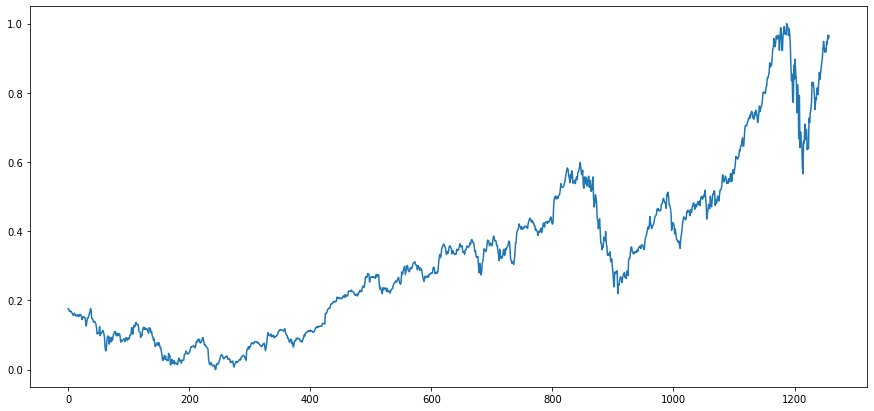

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(df_close_scaled)
plt.show()

In [8]:
df_train, df_test = train_test_split(df_close_scaled, shuffle=False, test_size=0.3)

display(df_close_scaled.shape, df_train.shape, df_test.shape)

(1258, 1)

(880, 1)

(378, 1)

In [9]:
def modify_data_for_lstm(data, size=5):
  n = data.shape[0]
  X, y = [], []

  for i in range(n-size):
    X.append(data[i:i+size])
    y.append(data[i+size][0])

  # return np.array(X).reshape(n-size, size), np.array(y).reshape(n-size)
  return np.array(X), np.array(y)

X_train, y_train = modify_data_for_lstm(df_train, size=30)
X_test, y_test = modify_data_for_lstm(df_test, size=30)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(850, 30, 1)

(348, 30, 1)

(850,)

(348,)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [11]:
model = Sequential(layers=[
    LSTM(50, return_sequences=True, input_shape=X_train.shape[1:]),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
27/27 [==============================] - 17s 161ms/step - loss: 0.0083 - val_loss: 0.0092
Epoch 2/50
27/27 [==============================] - 1s 49ms/step - loss: 0.0011 - val_loss: 0.0078
Epoch 3/50
27/27 [==============================] - 1s 47ms/step - loss: 7.6651e-04 - val_loss: 0.0047
Epoch 4/50
27/27 [==============================] - 1s 48ms/step - loss: 7.3911e-04 - val_loss: 0.0038
Epoch 5/50
27/27 [==============================] - 1s 46ms/step - loss: 7.0270e-04 - val_loss: 0.0055
Epoch 6/50
27/27 [==============================] - 1s 46ms/step - loss: 7.2980e-04 - val_loss: 0.0054
Epoch 7/50
27/27 [==============================] - 1s 46ms/step - loss: 7.0182e-04 - val_loss: 0.0037
Epoch 8/50
27/27 [==============================] - 1s 47ms/step - loss: 6.2779e-04 - val_loss: 0.0052
Epoch 9/50
27/27 [==============================] - 1s 49ms/step - loss: 5.7746e-04 - val_loss: 0.0047
Epoch 10/50
27/27 [==============================] - 1s 46ms/step - loss: 5.524

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_size, test_size = len(X_train), len(X_test)

display(y_train_pred.shape, y_test_pred.shape)

11/11 [==============================] - 0s 13ms/step


(850, 1)

(348, 1)

In [75]:
model.predict(np.array([X_train[0]]))

1/1 [==============================] - 0s 32ms/step


array([[0.14382929]], dtype=float32)

In [46]:
shift = 30

y_train_unscaled_pred = np.empty(shift + train_size)
y_train_unscaled_pred[:shift] = np.nan
y_train_unscaled_pred[-train_size:] = scaler.inverse_transform(y_train_pred).reshape(-1)

y_test_unscaled_pred = np.empty(shift*2 + train_size + test_size)
y_test_unscaled_pred[:shift*2+train_size] = np.nan
y_test_unscaled_pred[-test_size:] = scaler.inverse_transform(y_test_pred).reshape(-1)

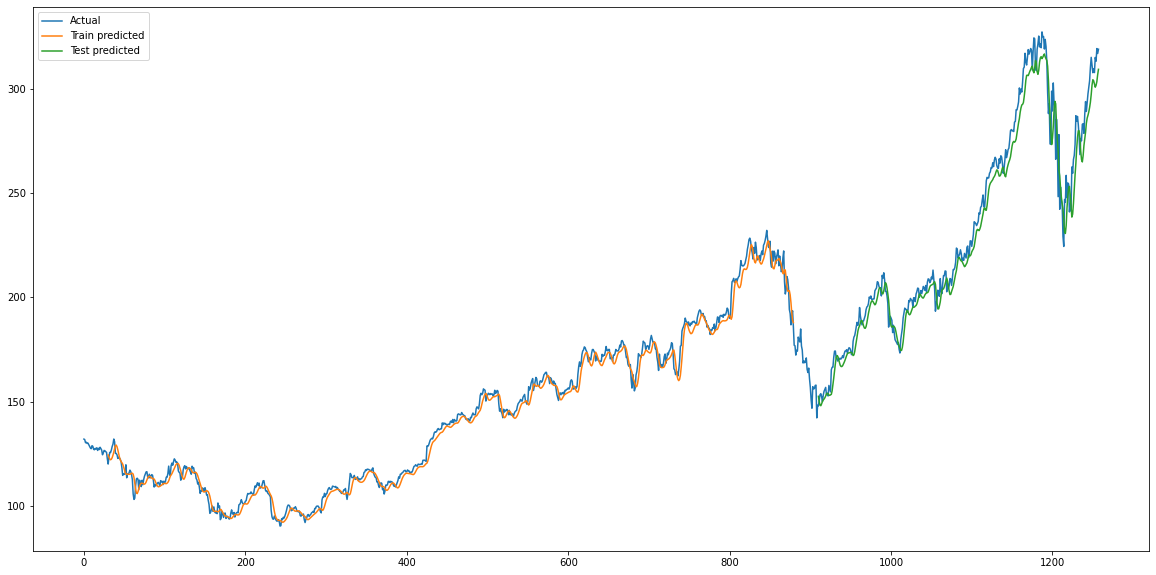

In [47]:
plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(df_close_scaled), label="Actual")
plt.plot(y_train_unscaled_pred, label="Train predicted")
plt.plot(y_test_unscaled_pred, label="Test predicted")
plt.legend()
plt.show()

# Now predict next 100 future values and plot it

In [43]:
df_close_scaled.shape

(1258, 1)

In [56]:
display([1,2,3,4,5,6], modify_data_for_lstm(np.array([1,2,3,4,5,6]).reshape(-1, 1), size=3))

[1, 2, 3, 4, 5, 6]

(array([[[1],
         [2],
         [3]],
 
        [[2],
         [3],
         [4]],
 
        [[3],
         [4],
         [5]]]), array([4, 5, 6]))

In [119]:
# using last 30 days data to predict from next day upto next 100 days

initial_data = list(df_close_scaled[:30].reshape(-1))
predicted = []

for i in range(100):
  pass

In [120]:
predicted_data = np.empty(df_close_scaled.shape[0] + 100)
predicted_data[:] = np.nan
predicted_data[-100:] = scaler.inverse_transform(np.array(predicted).reshape(1, -1)).reshape(-1)

plt.figure(figsize=(20, 10))
plt.plot(scaler.inverse_transform(df_close_scaled), label="Actual")
plt.plot(predicted_data, label="Test predicted")
plt.legend()
plt.show()

predicted_data[-100:]
# scaler.inverse_transform(np.array(predicted).reshape(1, -1)).reshape(-1)

ValueError: ignored